AMV Historical Data

In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [2]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 9:1
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
# 3. Chia dữ liệu train, test
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [4]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [5]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [6]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[24601.73204941 24619.51621683 24637.30038424 24655.08455166
 24672.86871907 24690.65288649 24708.4370539  24726.22122132
 24744.00538873 24761.78955615 24779.57372356 24797.35789098
 24815.14205839 24832.9262258  24850.71039322 24868.49456063
 24886.27872805 24904.06289546 24921.84706288 24939.63123029
 24957.41539771 24975.19956512 24992.98373254 25010.76789995
 25028.55206737 25046.33623478 25064.1204022  25081.90456961
 25099.68873703 25117.47290444]


In [7]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MLSE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 8509.430949539865
Testing RMSE: 8509.430949539865
Validation MAPE: 61.44644794596509
Testing MAPE: 61.44644794596509
Validation MSLE: 0.2355635808407306
Testing MSLE: 0.2355635808407306


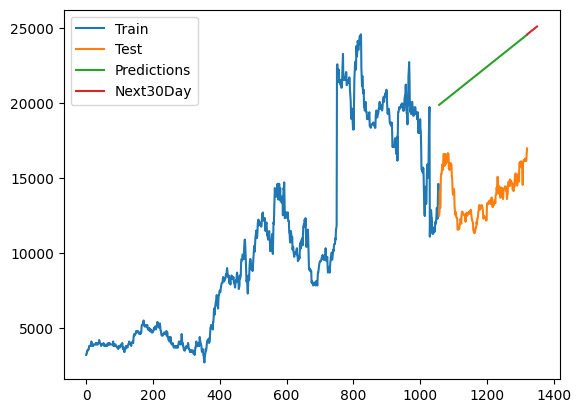

In [8]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

DHT Historical Data

In [9]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [10]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 9:1
df = pd.read_csv('DHT Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [11]:
# 3. Chia dữ liệu train, test
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

In [12]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [14]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[24566.16371458 24583.947882   24601.73204941 24619.51621683
 24637.30038424 24655.08455166 24672.86871907 24690.65288649
 24708.4370539  24726.22122132 24744.00538873 24761.78955615
 24779.57372356 24797.35789098 24815.14205839 24832.9262258
 24850.71039322 24868.49456063 24886.27872805 24904.06289546
 24921.84706288 24939.63123029 24957.41539771 24975.19956512
 24992.98373254 25010.76789995 25028.55206737 25046.33623478
 25064.1204022  25081.90456961]


In [15]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MLSE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 8509.430949539865
Testing RMSE: 8509.430949539865
Validation MAPE: 61.44644794596509
Testing MAPE: 61.44644794596509
Validation MSLE: 0.2355635808407306
Testing MSLE: 0.2355635808407306


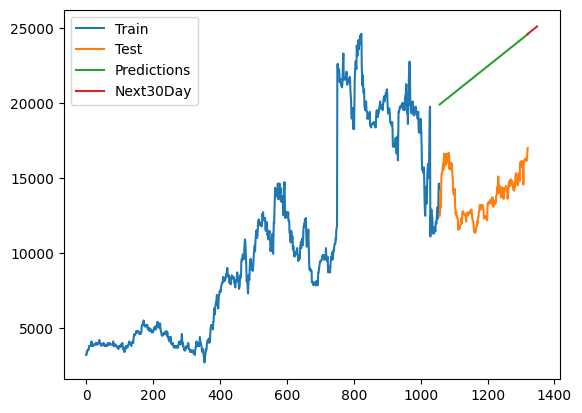

In [16]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

DP3 Historical Data

In [17]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [18]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 9:1
df = pd.read_csv('DP3 Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [19]:
# 3. Chia dữ liệu train, test
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

In [20]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [22]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[21471.7185844  21489.50275182 21507.28691923 21525.07108665
 21542.85525406 21560.63942148 21578.42358889 21596.20775631
 21613.99192372 21631.77609114 21649.56025855 21667.34442597
 21685.12859338 21702.9127608  21720.69692821 21738.48109563
 21756.26526304 21774.04943046 21791.83359787 21809.61776529
 21827.4019327  21845.18610011 21862.97026753 21880.75443494
 21898.53860236 21916.32276977 21934.10693719 21951.8911046
 21969.67527202 21987.45943943]


In [23]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MLSE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 8509.430949539865
Testing RMSE: 8509.430949539865
Validation MAPE: 61.44644794596509
Testing MAPE: 61.44644794596509
Validation MSLE: 0.2355635808407306
Testing MSLE: 0.2355635808407306


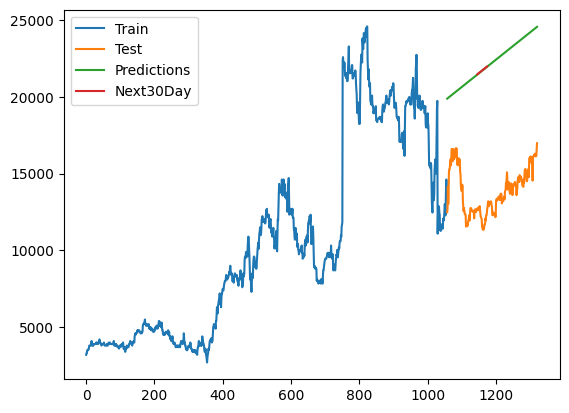

In [24]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()